In [1]:
import sys
sys.path.append('/home/hugo/PycharmProjects/routeplanner/src')

import osmnx as ox
import networkx as nx

import app_create
import traffic as tr
import logging

logging.basicConfig(filename='routeplanner.log', level=logging.DEBUG)

app = app_create.app_create()


2021-09-16 14:20:52 Configured OSMnx 1.1.1
2021-09-16 14:20:52 HTTP response caching is on
2021-09-16 14:20:57 Converting node, edge, and graph-level attribute data types
2021-09-16 14:20:58 Loaded graph with 41788 nodes and 82946 edges from "../data/madrid.gml"
2021-09-16 14:21:00 Created edges GeoDataFrame from graph


[14:21:02] ../src/executor/graph_executor.cc:1995: Subgraph backend MKLDNN is activated.


In [9]:
G = app.graph
rc = ['r', 'c']

In [10]:
def get_routes(origin_point, destination_point):
    route_predicted, valid = app.get_route(origin_point, destination_point)


    node_src = ox.distance.nearest_nodes(G, origin_point[0], origin_point[1])
    node_dst = ox.distance.nearest_nodes(G, destination_point[0], destination_point[1])
    route_shortest = nx.shortest_path(G, node_src, node_dst, weight='weight')
    routes = [route_predicted, route_shortest]

    fig, ax = ox.plot_graph_routes(G, routes, route_colors=rc, route_linewidth=6, node_size=0 )
    return route_predicted, route_shortest




2021-09-16 16:03:25 Created nodes GeoDataFrame from graph
2021-09-16 16:03:25 Created nodes GeoDataFrame from graph
2021-09-16 16:03:45 Created nodes GeoDataFrame from graph
2021-09-16 16:03:45 Created nodes GeoDataFrame from graph
2021-09-16 16:03:46 Begin plotting the graph...
2021-09-16 16:03:50 Created edges GeoDataFrame from graph
2021-09-16 16:03:58 Finished plotting the graph


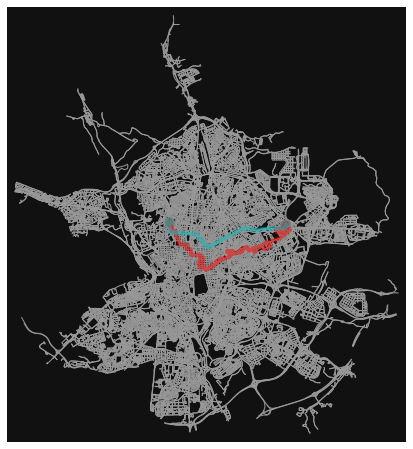

([355517097,
  351648656,
  254203843,
  251957427,
  251956657,
  251956661,
  251956206,
  5712160068,
  251956204,
  255658271,
  251952070,
  21716284,
  21716286,
  21716281,
  31053285,
  31053284,
  31053276,
  392310166,
  88976448,
  29795710,
  30097679,
  29795744,
  29795784,
  29795770,
  29795750,
  29795752,
  29795749,
  29795715,
  29795712,
  29795692,
  29795812,
  88976599,
  88976523,
  31053275,
  21716263,
  2063690213,
  2063690214,
  2063690206,
  2063690200,
  2063690209,
  506891608,
  560811351,
  571432744,
  255163388,
  30097698,
  30097697,
  30097696,
  29795727,
  29795729,
  255163653,
  29795725,
  255163720,
  29795722,
  31066966,
  29795837,
  3642316893,
  2208138773,
  31146526,
  2208138765,
  29795832,
  88976867,
  88976906,
  2208138760,
  2208138756,
  2208138754,
  2208138747,
  2208138744,
  2208138743,
  2208138742,
  4827268314,
  64944202,
  313152873,
  64944203,
  6329079859,
  64944206,
  64944207,
  2500065527,
  31107303,
  368212

In [8]:
origin_point = (-3.6121729, 40.4524813)
destination_point = (-3.7090030, 40.4538682)
predicted, shortest = get_routes(origin_point, destination_point)


In [14]:
def plot_around_point(route_predicted, route_shortest, point, delta):
    north = point[1] + delta
    south = point[1] - delta
    east = point[0] + 2*delta
    west = point[0] - 2*delta

    routes = [route_predicted, route_shortest]

    fig, ax = ox.plot_graph_routes(G, routes, route_colors=rc, route_linewidth=6, node_size=0, bbox=(north, south, east, west))


2021-09-16 16:10:17 Begin plotting the graph...
2021-09-16 16:10:22 Created edges GeoDataFrame from graph
2021-09-16 16:10:26 Finished plotting the graph


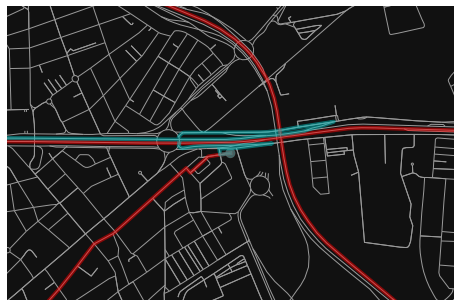

In [15]:
plot_around_point(predicted, shortest, origin_point, 0.005)

2021-09-16 16:10:27 Created nodes GeoDataFrame from graph
2021-09-16 16:10:28 Created nodes GeoDataFrame from graph
2021-09-16 16:11:00 Created nodes GeoDataFrame from graph
2021-09-16 16:11:00 Created nodes GeoDataFrame from graph
2021-09-16 16:11:01 Begin plotting the graph...
2021-09-16 16:11:05 Created edges GeoDataFrame from graph
2021-09-16 16:11:12 Finished plotting the graph


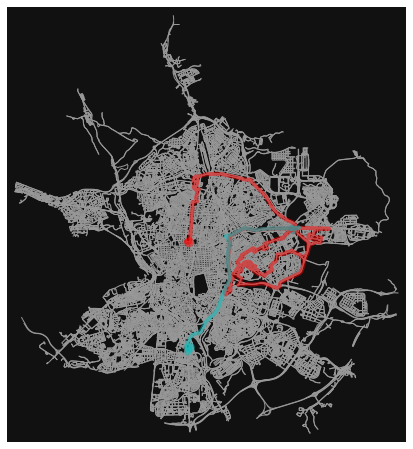

In [16]:
# very bad case
origin_point = (-3.605999, 40.449260)
destination_point = (-3.692042, 40.374467)

predicted, shortest = get_routes(origin_point, destination_point)


In [17]:
plot_around_point(predicted, shortest, origin_point, 0.01)

NameError: name 'rigin_point' is not defined

2021-09-16 16:12:11 Created nodes GeoDataFrame from graph
2021-09-16 16:12:12 Created nodes GeoDataFrame from graph
2021-09-16 16:12:14 Created nodes GeoDataFrame from graph
2021-09-16 16:12:15 Created nodes GeoDataFrame from graph
2021-09-16 16:12:15 Begin plotting the graph...
2021-09-16 16:12:19 Created edges GeoDataFrame from graph
2021-09-16 16:12:26 Finished plotting the graph


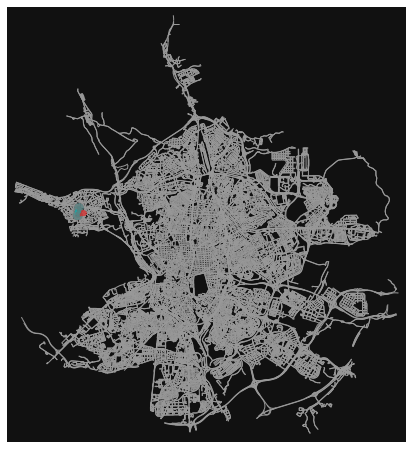

In [18]:
origin_point = (-3.784043, 40.462722)
destination_point = (-3.785179, 40.457935)

predicted, shortest = get_routes(origin_point, destination_point)

2021-09-16 16:12:27 Begin plotting the graph...
2021-09-16 16:12:31 Created edges GeoDataFrame from graph
2021-09-16 16:12:36 Finished plotting the graph


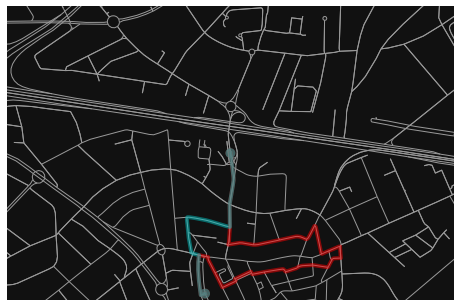

In [19]:
plot_around_point(predicted, shortest, origin_point, 0.005)